# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("./auto-mpg.csv")
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
models = []
models_mae = []
models_rmse = []

In [4]:
dataset.shape

(398, 9)

In [5]:
dataset.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [7]:
dataset.describe() # use when null values are found

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.253769,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.266840,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
# dataset.describe(include ='object')

## Data Preprocessing

### EXTRACTING DEPENDENT AND INDEPENDENT VARIABLE

In [9]:
X = dataset.iloc[:,1:-2].values
Y = dataset.iloc[:,0].values

In [10]:
print(X[:5])

[[   8.   307.   130.  3504.    12.    70. ]
 [   8.   350.   165.  3693.    11.5   70. ]
 [   8.   318.   150.  3436.    11.    70. ]
 [   8.   304.   150.  3433.    12.    70. ]
 [   8.   302.   140.  3449.    10.5   70. ]]


In [11]:
print(Y[:5])

[18. 15. 18. 16. 17.]


### Splitting, training and testing

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.15,random_state = 67)

In [13]:
print(X_train[:5])

[[4.000e+00 1.400e+02 7.200e+01 2.565e+03 1.360e+01 7.600e+01]
 [4.000e+00 1.510e+02 9.000e+01 2.735e+03 1.800e+01 8.200e+01]
 [8.000e+00 3.500e+02 1.650e+02 4.274e+03 1.200e+01 7.200e+01]
 [4.000e+00 8.500e+01 6.500e+01 2.020e+03 1.920e+01 7.900e+01]
 [4.000e+00 9.800e+01 6.800e+01 2.155e+03 1.650e+01 7.800e+01]]


In [14]:
print(X_test[:5])

[[   4.    91.    68.  1985.    16.    81. ]
 [   6.   231.   105.  3380.    15.8   78. ]
 [   4.   119.    82.  2720.    19.4   82. ]
 [   4.   119.    97.  2300.    14.7   78. ]
 [   4.   121.   110.  2660.    14.    73. ]]


In [15]:
print(Y_train[:5])

[26.5 27.  13.  31.8 30. ]


In [16]:
print(Y_test)

[34.1 20.6 31.  27.2 24.  16.  32.9 23.  32.4 19.2 23.  35.  30.  15.5
 36.4 34.  19.1 24.  17.5 28.4 15.  15.  19.2 33.5 25.  30.  24.  20.
 33.5 13.  25.  23.2 14.  21.  23.8 13.  16.  21.  17.5 29.  15.  13.
 44.6 18.  15.  32.  29.8 31.6 20.  30.  23.  40.9 36.  25.  19.  13.
 25.4 33.7 19.  21.5]


## Build multiple linear regression model 

In [17]:
from sklearn.linear_model import LinearRegression
mreg = LinearRegression()
mreg.fit(X_train,Y_train)

LinearRegression()

In [18]:
#check attribute of our model
print("Coefficient of our model", mreg.coef_)
print("Intercept of our model", mreg.intercept_)

Coefficient of our model [-0.30259234  0.01430265 -0.00243143 -0.00737306  0.12719853  0.74473781]
Intercept of our model -13.989376270782014


In [19]:
# accuracy of model
print("Accuracy of model = ",mreg.score(X_train,Y_train))

Accuracy of model =  0.8130073180094531


In [20]:
# predicting the test data
yhat = mreg.predict(X_test)
print(yhat[:5])

[33.65987038 22.42201963 29.78431724 29.26774714 22.79771375]


In [21]:
print("Accuracy of model = ",mreg.score(X_test,yhat))

Accuracy of model =  1.0


In [22]:
# print(Y_test)
# print (yhat)

## Variance Score of predicted values

In [23]:
print('Variance Score: {}'.format(mreg.score(X_test,Y_test)))

Variance Score: 0.7734273710711153


## Goodness of fit


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(Y_test,yhat)
print(r2)

mae = mean_absolute_error(Y_test,yhat)
print(mae)

mse = mean_squared_error(Y_test,yhat)
print(mse)

from math import sqrt
models_rmse.append(sqrt(mse))
models_mae.append(mae)
row = r2
models.append(row)

0.7734273710711153
2.8597356333749118
13.3692420946819


# plot for residual error 
  
## setting plot style 

In [25]:
plt.style.use('fivethirtyeight') 

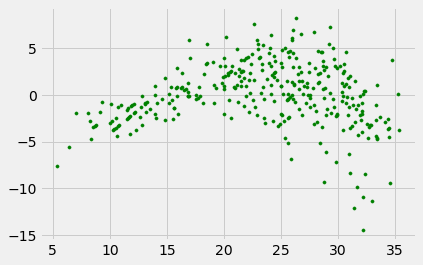

In [26]:
plt.scatter(mreg.predict(X_train), mreg.predict(X_train) - Y_train,color = "green", s = 10, label = 'Train data') 

## residual Error

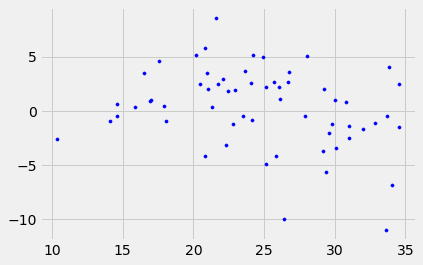

In [27]:
plt.scatter(mreg.predict(X_test), mreg.predict(X_test) - Y_test,color = "blue", s = 10, label = 'Test data') 

# Decision Tree

In [28]:
print(X_train[:5])
print(X_test[:5])
print(Y_test[:5])
print(Y_train[:5])

[[4.000e+00 1.400e+02 7.200e+01 2.565e+03 1.360e+01 7.600e+01]
 [4.000e+00 1.510e+02 9.000e+01 2.735e+03 1.800e+01 8.200e+01]
 [8.000e+00 3.500e+02 1.650e+02 4.274e+03 1.200e+01 7.200e+01]
 [4.000e+00 8.500e+01 6.500e+01 2.020e+03 1.920e+01 7.900e+01]
 [4.000e+00 9.800e+01 6.800e+01 2.155e+03 1.650e+01 7.800e+01]]
[[   4.    91.    68.  1985.    16.    81. ]
 [   6.   231.   105.  3380.    15.8   78. ]
 [   4.   119.    82.  2720.    19.4   82. ]
 [   4.   119.    97.  2300.    14.7   78. ]
 [   4.   121.   110.  2660.    14.    73. ]]
[34.1 20.6 31.  27.2 24. ]
[26.5 27.  13.  31.8 30. ]


In [29]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 5)
reg.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5)

In [30]:
y_pred = reg.predict(X_test)

In [31]:
print("Accuracy of model = ",reg.score(X_train,Y_train))

Accuracy of model =  0.9287321025038034


In [32]:
print("Accuracy of model = ",reg.score(X_test,y_pred))

Accuracy of model =  1.0


In [33]:
print('Variance Score: {}'.format(reg.score(X_test,Y_test)))

Variance Score: 0.7368856316786296


In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg, X_train, Y_train, cv=10)

array([0.82858678, 0.78608274, 0.77262765, 0.86153547, 0.7828252 ,
       0.76734585, 0.80475805, 0.89957281, 0.77047208, 0.80630994])

In [35]:
r_squared = r2_score(Y_test,y_pred)
print(r_squared)

mae = mean_absolute_error(Y_test,y_pred)
print(mae)

mse = mean_squared_error(Y_test,y_pred)
print(mse)

row = r_squared
models.append(row)
models_rmse.append(sqrt(mse))
models_mae.append(mae)

0.7368856316786296
2.95371040801304
15.525439702523807


In [36]:
from sklearn import tree
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_0 <= 4.50
|   |--- feature_2 <= 70.50
|   |   |--- feature_5 <= 77.50
|   |   |   |--- feature_3 <= 1829.50
|   |   |   |   |--- feature_5 <= 76.50
|   |   |   |   |   |--- value: [32.60]
|   |   |   |   |--- feature_5 >  76.50
|   |   |   |   |   |--- value: [36.00]
|   |   |   |--- feature_3 >  1829.50
|   |   |   |   |--- feature_5 <= 73.50
|   |   |   |   |   |--- value: [26.14]
|   |   |   |   |--- feature_5 >  73.50
|   |   |   |   |   |--- value: [29.86]
|   |   |--- feature_5 >  77.50
|   |   |   |--- feature_4 <= 21.10
|   |   |   |   |--- feature_1 <= 94.00
|   |   |   |   |   |--- value: [37.16]
|   |   |   |   |--- feature_1 >  94.00
|   |   |   |   |   |--- value: [33.50]
|   |   |   |--- feature_4 >  21.10
|   |   |   |   |--- feature_3 <= 2035.00
|   |   |   |   |   |--- value: [43.10]
|   |   |   |   |--- feature_3 >  2035.00
|   |   |   |   |   |--- value: [43.90]
|   |--- feature_2 >  70.50
|   |   |--- feature_5 <= 78.50
|   |   |   |--- feature_3 <= 227

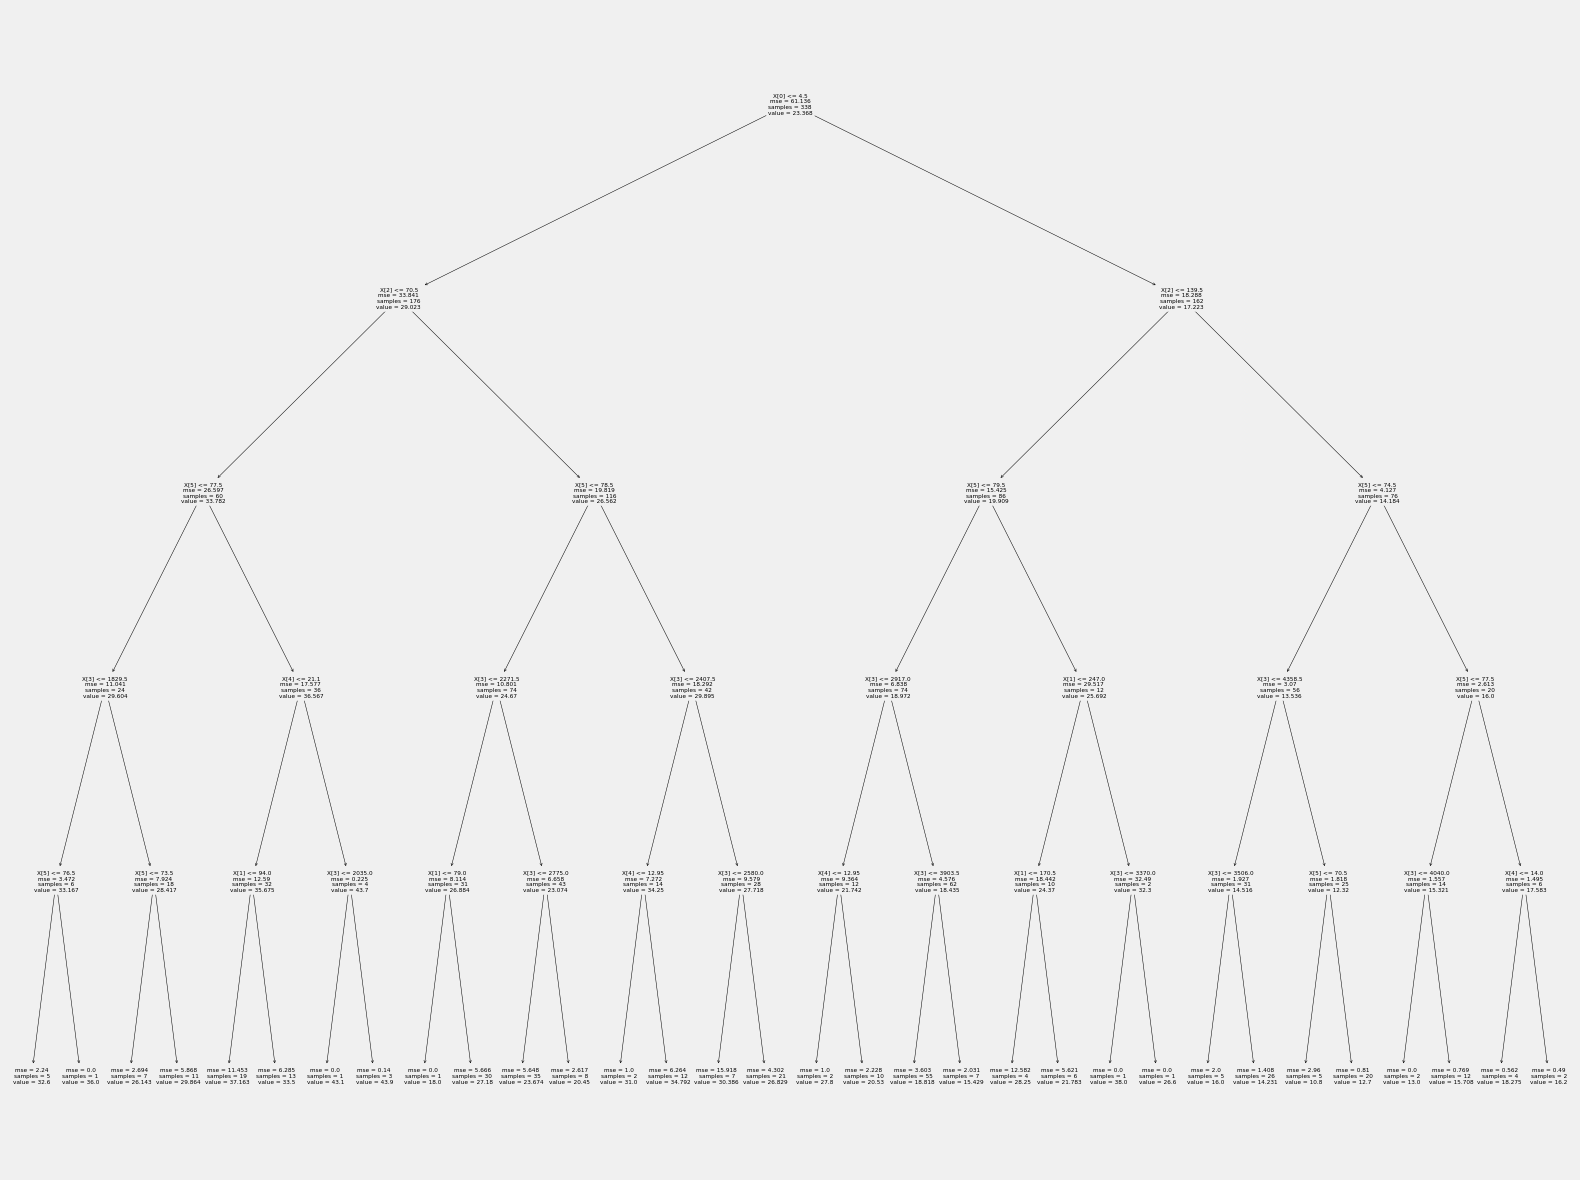

In [37]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(reg)
plt.show()

In [38]:
from sklearn.metrics import r2_score
from sklearn.svm import SVR
svr = SVR()
gg = svr.fit(X_train, Y_train)
predictions = svr.predict(X_test)

r_squared = r2_score(y_pred, predictions)
print(r_squared)

mae = mean_absolute_error(Y_test,predictions)
print(mae)

mse = mean_squared_error(Y_test,predictions)
print(mse)

models_rmse.append(sqrt(mse))
models_mae.append(mae)

0.6060236390761735
3.448244574317521
22.65659940375716


In [39]:
cross_val_score(gg, X_train, Y_train, cv=10)

array([0.79406879, 0.68348478, 0.50065659, 0.81899071, 0.58966543,
       0.64231804, 0.7472614 , 0.70340125, 0.7805161 , 0.62579219])

In [40]:
gg.score(X_test,predictions)

1.0

In [41]:
print('Variance Score: {}'.format(gg.score(X_test,Y_test)))

Variance Score: 0.6160316902676297


In [42]:
row = r_squared
models.append(row)

# KNN

In [43]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

knn_predictions = neigh.predict(X_test)

In [44]:
neigh.score(X_train,Y_train)

0.9018916287647447

In [45]:
print('Variance Score: {}'.format(neigh.score(X_test,Y_test)))

Variance Score: 0.6123628709959343


In [46]:
r_squared = r2_score(y_pred, knn_predictions)
print(r_squared)

mae = mean_absolute_error(Y_test,knn_predictions)
print(mae)

mse = mean_squared_error(Y_test,knn_predictions)
print(mse)

0.5890320403893478
3.5700000000000003
22.873083333333334


In [47]:
row = r_squared
models.append(row)
models_rmse.append(sqrt(mse))
models_mae.append(mae)

In [48]:
models

[0.7734273710711153,
 0.7368856316786296,
 0.6060236390761735,
 0.5890320403893478]

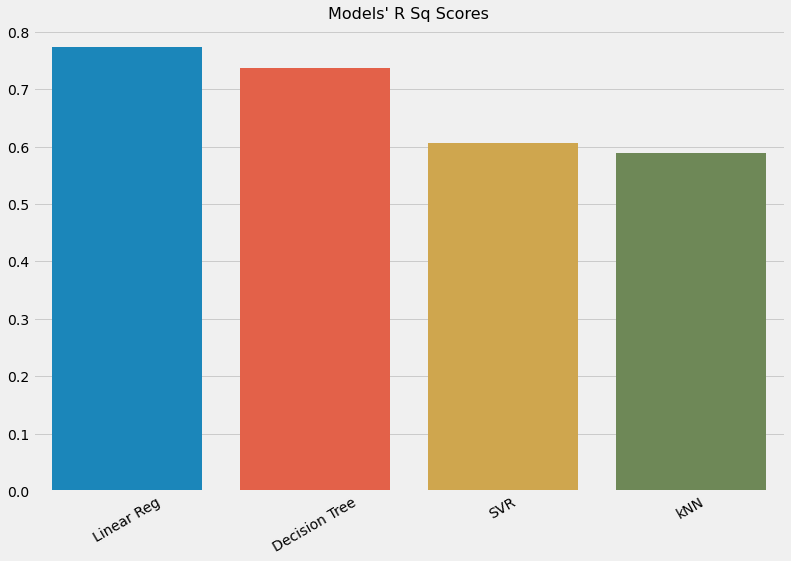

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(x=["Linear Reg","Decision Tree","SVR","kNN"], y=models)
plt.title("Models' R Sq Scores", size=16)
plt.xticks(rotation=30)
plt.show()

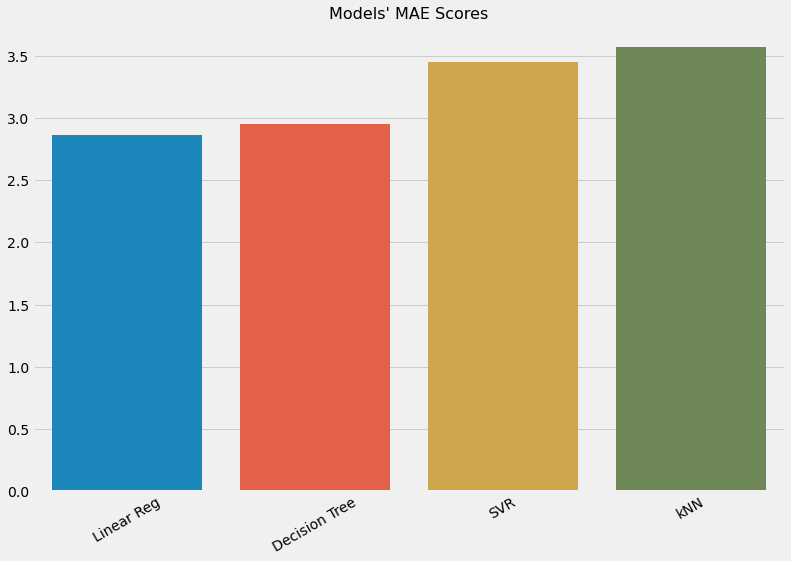

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(x=["Linear Reg","Decision Tree","SVR","kNN"], y=models_mae)
plt.title("Models' MAE Scores", size=16)
plt.xticks(rotation=30)
plt.show()

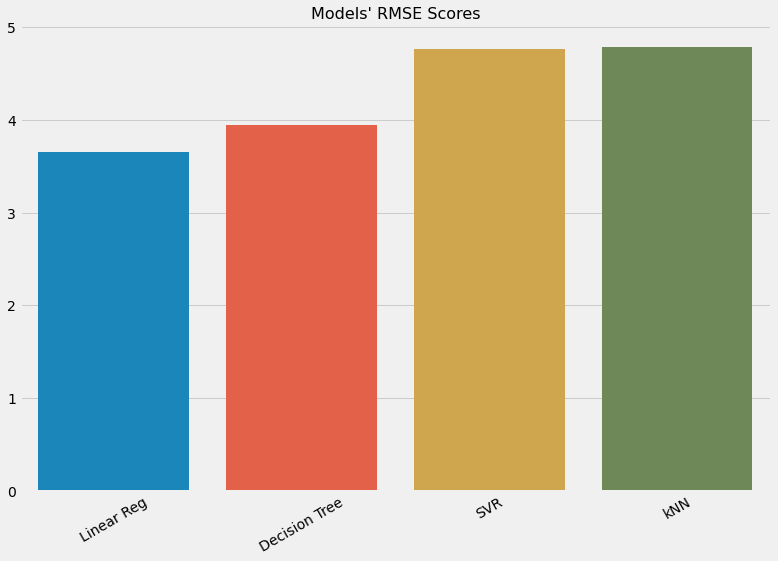

In [51]:
plt.figure(figsize=(12,8))
sns.barplot(x=["Linear Reg","Decision Tree","SVR","kNN"], y=models_rmse)
plt.title("Models' RMSE Scores", size=16)
plt.xticks(rotation=30)
plt.show()